In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
from kaggle.api.kaggle_api_extended import KaggleApi
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Autenticar la API de Kaggle
api = KaggleApi()
api.authenticate()

# Nombre del conjunto de datos
dataset_name = 'noaa/seismic-waves'

# Directorio donde se descargará y descomprimirá el conjunto de datos
base_path = 'C:/Users/nuria/Documents/proyecto'

# Crear el directorio si no existe
#os.makedirs(base_path, exist_ok=True)

# Descargar el conjunto de datos
api.dataset_download_files(dataset_name, path=base_path)

# Ruta completa del archivo zip descargado
zip_path = os.path.join(base_path, f'{dataset_name.split("/")[-1]}.zip')

# Descomprimir el archivo descargado
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(base_path)

In [3]:
df_sources = pd.read_csv(r'C:\Users\nuria\Documents\proyecto\sources.csv')
df_sources

,SOURCE_ID,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
0,1,-2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
1,3,-1610,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
2,4,-1365,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,5,-1300,NaN,NaN,NaN,NaN,0.0,2.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,-760,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,5632,2016,12.0,9.0,19.0,10.0,1.0,4.0,21.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2578,5636,2016,12.0,17.0,10.0,51.0,1.0,4.0,103.0,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2579,5637,2016,12.0,25.0,14.0,22.0,1.0,4.0,35.0,7.6,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2580,5639,2017,1.0,3.0,21.0,5.0,1.0,4.0,17.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SOURCE_ID                   2582 non-null   int64  
 1   YEAR                        2582 non-null   int64  
 2   MONTH                       2443 non-null   float64
 3   DAY                         2341 non-null   float64
 4   HOUR                        1319 non-null   float64
 5   MINUTE                      1233 non-null   float64
 6   CAUSE                       2576 non-null   float64
 7   VALIDITY                    2580 non-null   float64
 8   FOCAL_DEPTH                 867 non-null    float64
 9   PRIMARY_MAGNITUDE           1459 non-null   float64
 10  REGION_CODE                 2581 non-null   float64
 11  COUNTRY                     2581 non-null   object 
 12  STATE/PROVINCE              293 non-null    object 
 13  LOCATION                    2570 

In [5]:
df_sources.isnull().sum()

SOURCE_ID                        0
YEAR                             0
MONTH                          139
DAY                            241
HOUR                          1263
MINUTE                        1349
CAUSE                            6
VALIDITY                         2
FOCAL_DEPTH                   1715
PRIMARY_MAGNITUDE             1123
REGION_CODE                      1
COUNTRY                          1
STATE/PROVINCE                2289
LOCATION                        12
LATITUDE                       359
LONGITUDE                      360
MAXIMUM_HEIGHT                1540
MAGNITUDE_ABE                 2582
MAGNITUDE_IIDA                1841
INTENSITY_SOLOVIEV            1358
WARNING_STATUS                2531
MISSING                       2526
MISSING_ESTIMATE              2514
INJURIES                      2578
INJURY_ESTIMATE               2578
FATALITIES                    2346
FATALITY_ESTIMATE             2258
DAMAGE_MILLIONS_DOLLARS       2542
DAMAGE_ESTIMATE     

df_sources tiene muchas columnas con valores nulos. Coincide que esas columnas no las voy a utilizar por lo que me quedo unicamente con las columnas que no tienen nulos o muy poco:

- SOURCE_ID: identificador único para cada registro
- YEAR: año en el que ocurrio el tsunami
- MONTH 
- DAY
- CAUSE: Código de Causa del Tsunami. Valores válidos: 0 a 11.La fuente del tsunami:
    - 0: Desconocido
    - 1:Terremoto
    - 2: Terremoto cuestionable
    - 3: Terremoto y deslizamiento de tierra
    - 4: Volcán y terremoto
    - 5: Volcán, terremoto y deslizamiento de tierra
    - 6: Volcán
    - 7: Volcán y deslizamiento de tierra
    - 8: Deslizamiento de tierra
    - 9:Meteorológico
    - 10: Explosión
    - 11: Marea astronómica

- VALIDITY: Valores válidos: -1 a 4. La validez del tsunami real se indica mediante una calificación numérica de los informes de ese evento:
    - -1: Entrada errónea
    - 0: Evento que solo causó un seiche o perturbación en un río o lago interior
    - 1: Tsunami muy dudoso
    - 2: Tsunami cuestionable
    - 3: Tsunami probable
    - 4:Tsunami definitivo
- REGION_CODE: Regional boundaries defined as follows:
    - 87 - Alaska (including Aleutian Islands)
    - 40 - Black Sea and Caspian Sea
    - 74 - Caribbean Sea
    - 78 - Central Africa
    - 84 - China, North and South Korea, Philippines, Taiwan
    - 81 - E Coast Australia, New Zealand, South Pacific Is.
    - 75 - East Coast USA and Canada, St Pierre and Miquelon
    - 76 - Gulf of Mexico
    - 80 - Hawaii, Johnston Atoll, Midway I
    - 60 - Indian Ocean (including west coast of Australia)
    - 83 - Indonesia (Pacific Ocean) and Malaysia
    - 85 - Japan
    - 86 - Kamchatka and Kuril Islands
    - 50 - Mediterranean Sea
    - 82 - New Caledonia, New Guinea, Solomon Is., Vanuatu
    - 73 - Northeast Atlantic Ocean
    - 72 - Northwest Atlantic Ocean
    - 30 - Red Sea and Persian Gulf
    - 70 - Southeast Atlantic Ocean
    - 71 - Southwest Atlantic Ocean
    - 77 - West Coast of Africa
    - 88 - West Coast of North and Central America
    - 89 - West Coast of South America

- COUNTRY: El país donde ocurrió la fuente del tsunami (por ejemplo, ingresa: Japón o Rusia).
- LOCATION: El país, estado, provincia o isla donde ocurrió la fuente del tsunami (por ejemplo, ingresa: Japón o Honshu).Esta es solo una ubicación geográfica aproximada. Los eventos anteriores a 1900 no fueron ubicados instrumentalmente, por lo tanto, la ubicación proporcionada se basa en la latitud y longitud de la ciudad donde ocurrieron los efectos máximos. Si hay diferentes formas de escribir el nombre de una ciudad, los nombres adicionales están entre paréntesis.

In [6]:
df_sources.duplicated().sum()

0

In [7]:
df_sources = df_sources.drop(['HOUR','MINUTE', 'FOCAL_DEPTH','PRIMARY_MAGNITUDE', 'STATE/PROVINCE', 'LATITUDE', 'LONGITUDE','MAXIMUM_HEIGHT','MAGNITUDE_ABE','MAGNITUDE_IIDA','INTENSITY_SOLOVIEV','WARNING_STATUS','MISSING','MISSING_ESTIMATE','INJURIES','INJURY_ESTIMATE','FATALITIES','FATALITY_ESTIMATE','DAMAGE_MILLIONS_DOLLARS','DAMAGE_ESTIMATE',
'HOUSES_DAMAGED','HOUSE_DAMAGE_ESTIMATE','HOUSES_DESTROYED','HOUSE_DESTRUCTION_ESTIMATE','ALL_MISSING','MISSING_TOTAL','ALL_INJURIES','INJURY_TOTAL','ALL_FATALITIES','FATALITY_TOTAL','ALL_DAMAGE_MILLIONS','DAMAGE_TOTAL','ALL_HOUSES_DAMAGED','HOUSE_DAMAGE_TOTAL','ALL_HOUSES_DESTROYED','HOUSE_DESTRUCTION_TOTAL'], axis=1)
df_sources.head()

,SOURCE_ID,YEAR,MONTH,DAY,CAUSE,VALIDITY,REGION_CODE,COUNTRY,LOCATION
0,1,-2000,NaN,NaN,1.0,1.0,50.0,SYRIA,SYRIAN COASTS
1,3,-1610,NaN,NaN,6.0,4.0,50.0,GREECE,THERA ISLAND (SANTORINI)
2,4,-1365,NaN,NaN,1.0,1.0,50.0,SYRIA,SYRIAN COASTS
3,5,-1300,NaN,NaN,0.0,2.0,50.0,TURKEY,"IONIAN COASTS, TROAD"
4,6,-760,NaN,NaN,0.0,2.0,50.0,ISRAEL,ISRAEL AND LEBANON COASTS


In [8]:
df_sources.isnull().sum()

SOURCE_ID        0
YEAR             0
MONTH          139
DAY            241
CAUSE            6
VALIDITY         2
REGION_CODE      1
COUNTRY          1
LOCATION        12
dtype: int64

Las columnas YEAR y SOURCE_ID no contienen nulos 
  
Antes de 1960 no había métodos de localización computarizados.

Elimino las entradas nulas de CAUSE, VALIDITY , REGION_CODE, LOCATION, COUNTRY para realizar algunas visualizaciones antes de eliminar las entradas previas a 1960

In [9]:
df_sources = df_sources.dropna(subset=['VALIDITY', 'CAUSE','REGION_CODE','LOCATION', 'COUNTRY'])
df_sources.isnull().sum()

SOURCE_ID        0
YEAR             0
MONTH          137
DAY            239
CAUSE            0
VALIDITY         0
REGION_CODE      0
COUNTRY          0
LOCATION         0
dtype: int64

Copio el df para tener un df_text con los códigos numéricos cambiados a texto para las visualizaciones. realizo un mapeo de los códigos de CAUSES, VALIDITY y REGION_CODE para añadir los datos a los que hacen referencias esos códigos númericos.

In [10]:
## Mapeo 
causes = {
    0: "Desconocido",
    1: "Terremoto",
    2: "Terremoto cuestionable",
    3: "Terremoto y deslizamiento de tierra",
    4: "Volcán y terremoto",
    5: "Volcán, terremoto y deslizamiento de tierra",
    6: "Volcán",
    7: "Volcán y deslizamiento de tierra",
    8: "Deslizamiento de tierra",
    9: "Meteorológico",
    10: "Explosión",
    11: "Marea astronómica"
}


validities= {
    -1: "Entrada errónea",
    0: "seiche, pert. río o lago", 
    1: "Tsunami muy dudoso",
    2: "Tsunami cuestionable",
    3: "Tsunami probable", 
    4: "Tsunami definitivo"
}

region = {
    87: "Alaska (including Aleutian Islands)",
    40: "Black Sea and Caspian Sea",
    74: "Caribbean Sea",
    78: "Central Africa",
    84: "China, North and South Korea, Philippines, Taiwan",
    81: "E Coast Australia, New Zealand, South Pacific Is.",
    75: "East Coast USA and Canada, St Pierre and Miquelon",
    76: "Gulf of Mexico",
    80: "Hawaii, Johnston Atoll, Midway I",
    60: "Indian Ocean (including west coast of Australia)",
    83: "Indonesia (Pacific Ocean) and Malaysia",
    85: "Japan",
    86: "Kamchatka and Kuril Islands",
    50: "Mediterranean Sea",
    82: "New Caledonia, New Guinea, Solomon Is., Vanuatu",
    73: "Northeast Atlantic Ocean",
    72: "Northwest Atlantic Ocean",
    30: "Red Sea and Persian Gulf",
    70: "Southeast Atlantic Ocean",
    71: "Southwest Atlantic Ocean",
    77: "West Coast of Africa",
    88: "West Coast of North and Central America",
    89: "West Coast of South America"
}

df_text = df_sources.copy()


# Asignar la validez mapeadas a una nueva columna llamada 'VALIDITIES' usando .loc[]
df_text.loc[:, 'VALIDITIES'] = df_text['VALIDITY'].apply(lambda x: validities.get(x, "Desconocido"))

# Asignar las regiones mapeadas a una nueva columna llamada 'REGIONS' usando .loc[]
df_text.loc[:, 'REGION'] = df_text['REGION_CODE'].apply(lambda x: region.get(x, "Desconocido"))


# Asignar las causas mapeadas a una nueva columna llamada 'CAUSES' usando .loc[]
df_text.loc[:, 'CAUSES'] = df_text['CAUSE'].apply(lambda x: causes.get(x, "Desconocido"))

df_text = df_text.drop(['VALIDITY','REGION_CODE', 'CAUSE'], axis=1)

df_text


,SOURCE_ID,YEAR,MONTH,DAY,COUNTRY,LOCATION,VALIDITIES,REGION,CAUSES
0,1,-2000,NaN,NaN,SYRIA,SYRIAN COASTS,Tsunami muy dudoso,Mediterranean Sea,Terremoto
1,3,-1610,NaN,NaN,GREECE,THERA ISLAND (SANTORINI),Tsunami definitivo,Mediterranean Sea,Volcán
2,4,-1365,NaN,NaN,SYRIA,SYRIAN COASTS,Tsunami muy dudoso,Mediterranean Sea,Terremoto
3,5,-1300,NaN,NaN,TURKEY,"IONIAN COASTS, TROAD",Tsunami cuestionable,Mediterranean Sea,Desconocido
4,6,-760,NaN,NaN,ISRAEL,ISRAEL AND LEBANON COASTS,Tsunami cuestionable,Mediterranean Sea,Desconocido
...,...,...,...,...,...,...,...,...,...
2577,5632,2016,12.0,9.0,SOLOMON ISLANDS,SOLOMON ISLANDS,Tsunami definitivo,"New Caledonia, New Guinea, Solomon Is., Vanuatu",Terremoto
2578,5636,2016,12.0,17.0,PAPUA NEW GUINEA,SOLOMON SEA,Tsunami definitivo,"New Caledonia, New Guinea, Solomon Is., Vanuatu",Terremoto
2579,5637,2016,12.0,25.0,CHILE,SOUTHERN CHILE,Tsunami definitivo,West Coast of South America,Terremoto
2580,5639,2017,1.0,3.0,FIJI,FIJI ISLANDS,Tsunami definitivo,"E Coast Australia, New Zealand, South Pacific Is.",Terremoto


### VISUALIZACIONES CAUSAS Y VALIDEZ: total, antes y después 1960

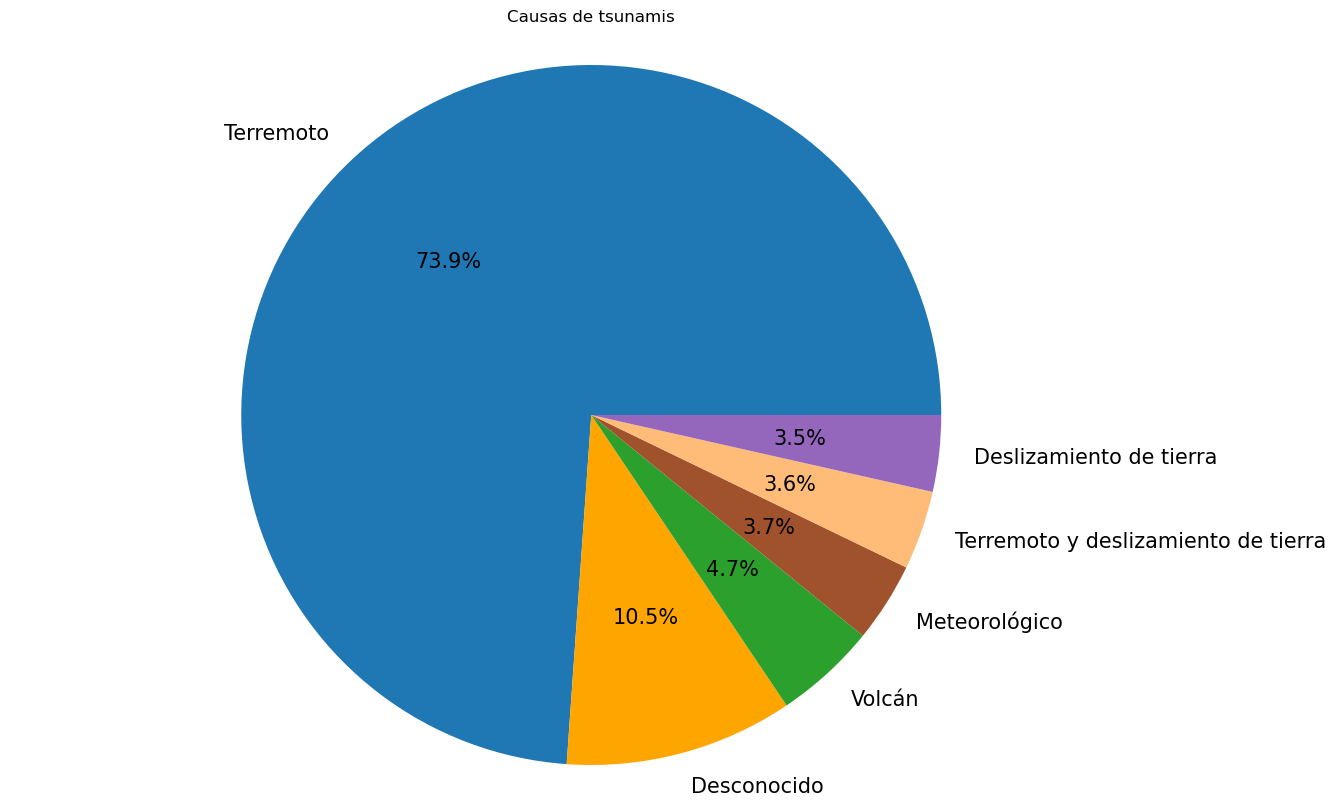

In [11]:

# Calcula el conteo de cada causa
causes_count = df_text['CAUSES'].value_counts()

# Filtra solo las causas que tengan una frecuencia mayor o igual a 15
causes_filtered = causes_count[causes_count >= 15]

# Define colores para cada causa (puedes añadir más colores según sea necesario)
colors_dict = {
    "Desconocido": 'orange',
    "Terremoto":  '#1f77b4',
    "Terremoto cuestionable" :'green',
    "Terremoto y deslizamiento de tierra" : '#ffbb78',
    "Volcán y terremoto" : 'brown',
    "Volcán, terremoto y deslizamiento de tierra": 'pink',
    "Volcán":'#2ca02c',
    "Volcán y deslizamiento de tierra":'grey',
    "Deslizamiento de tierra": '#9467bd',
    "Meteorológico" : 'sienna',
    "Explosión":'orchid',
    "Marea astronómica" : 'sienna'
    # Añade más colores y causas según sea necesario
}

# Extrae solo las causas y frecuencias de las causas filtradas
filtered_causes = causes_filtered.index

# Extrae los colores correspondientes a las causas filtradas del diccionario de colores
colors = [colors_dict[cause] for cause in filtered_causes]

# Crea el gráfico de pastel con colores personalizados
plt.figure(figsize=(15, 10))
plt.pie(causes_filtered, labels=filtered_causes, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 15})
plt.title('Causas de tsunamis')
plt.axis('equal')  # Asegura que el pastel se dibuje como un círculo.
plt.savefig('causas.jpg')
plt.show()


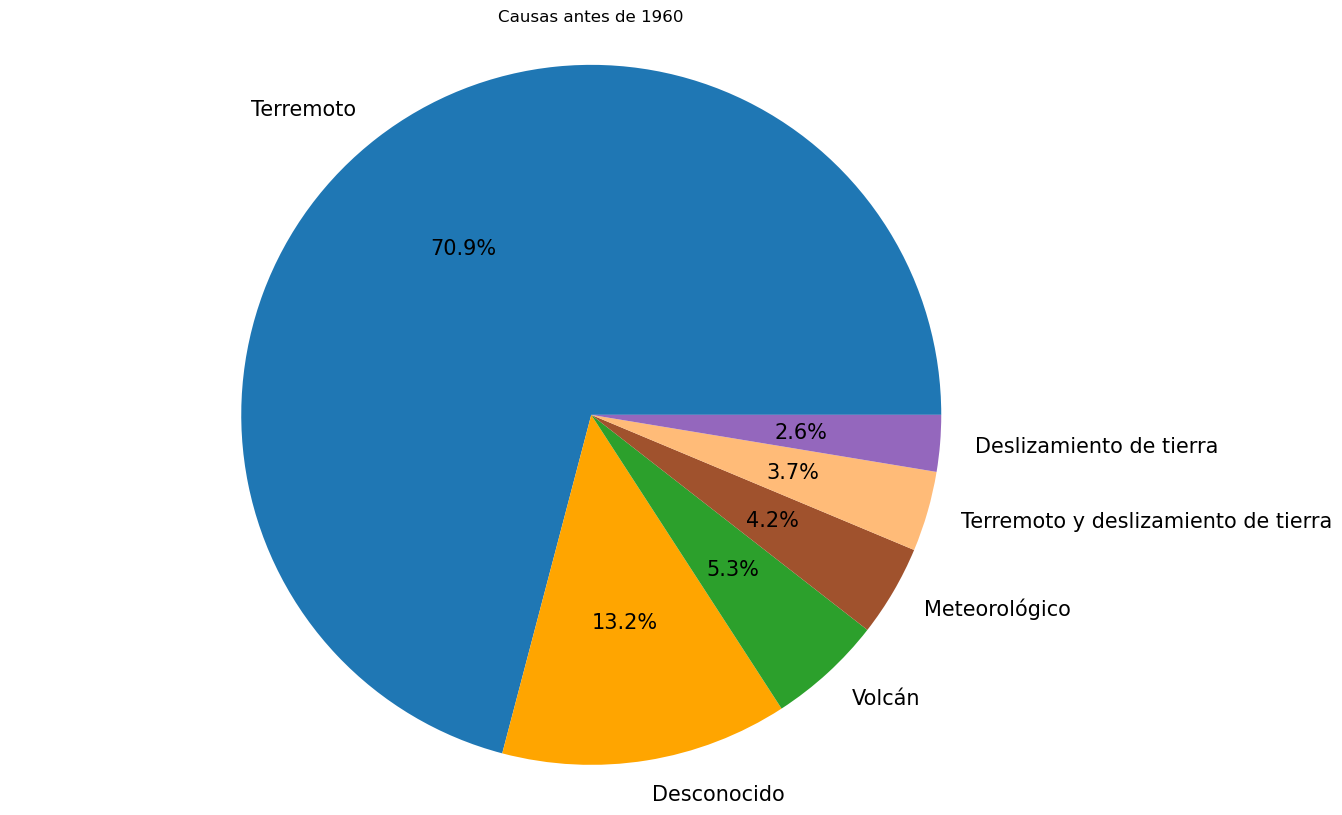

In [12]:
# Filtra los datos con YEAR anterior a 1960
df_before = df_text[df_text['YEAR'] < 1960]

# Calcula el conteo de cada causa
causes_count = df_before['CAUSES'].value_counts()

# Filtra solo las causas que tengan una frecuencia mayor o igual a 15
causes_filtered = causes_count[causes_count >= 15]

# Define colores para cada causa (puedes añadir más colores según sea necesario)
colors_dict = {
    "Desconocido": 'orange',
    "Terremoto":  '#1f77b4',
    "Terremoto cuestionable" :'green',
    "Terremoto y deslizamiento de tierra" : '#ffbb78',
    "Volcán y terremoto" : 'brown',
    "Volcán, terremoto y deslizamiento de tierra": 'pink',
    "Volcán":'#2ca02c',
    "Volcán y deslizamiento de tierra":'grey',
    "Deslizamiento de tierra": '#9467bd',
    "Meteorológico" : 'sienna',
    "Explosión":'orchid',
    "Marea astronómica" : 'sienna'
    # Añade más colores y causas según sea necesario
}

# Extrae solo las causas y frecuencias de las causas filtradas
filtered_causes = causes_filtered.index

# Extrae los colores correspondientes a las causas filtradas del diccionario de colores
colors = [colors_dict[cause] for cause in filtered_causes]

# Crea el gráfico de pastel con colores personalizados
plt.figure(figsize=(15, 10))
plt.pie(causes_filtered, labels=filtered_causes, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 15})
plt.title('Causas antes de 1960')
plt.axis('equal')  # Asegura que el pastel se dibuje como un círculo.
# Guarda el gráfico como imagen PNG
plt.savefig('causasantes.jpg')
plt.show()


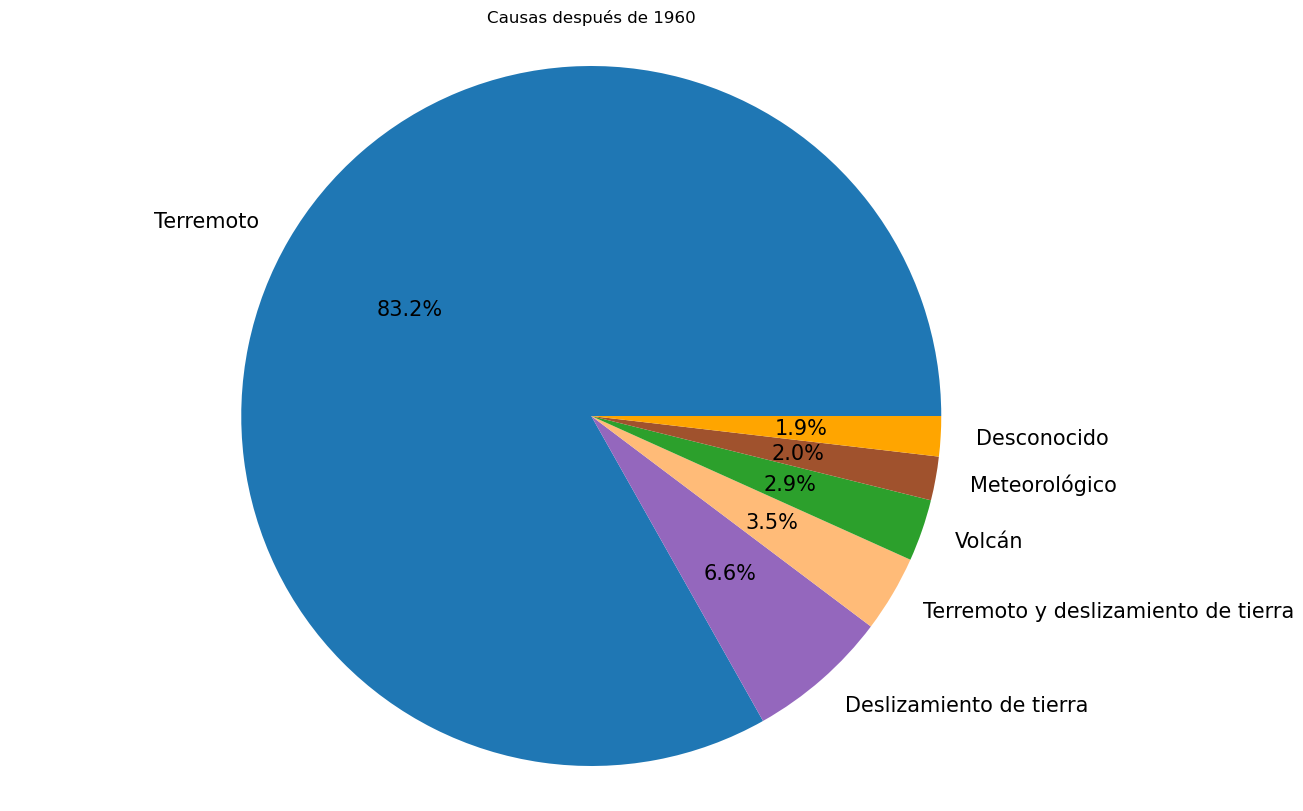

In [13]:
# Filtra los datos con YEAR posterior a 1960
df_after = df_text[df_text['YEAR'] > 1960]

# Calcula el conteo de cada causa en los datos filtrados
causes_count = df_after['CAUSES'].value_counts()

# Filtra solo las causas que tengan una frecuencia mayor o igual a 15
causes_filtered = causes_count[causes_count >= 10]

# Define colores para cada causa (puedes añadir más colores según sea necesario)
colors_dict = {
    "Desconocido": 'orange',
    "Terremoto":  '#1f77b4',
    "Terremoto cuestionable" :'green',
    "Terremoto y deslizamiento de tierra" : '#ffbb78',
    "Volcán y terremoto" : 'brown',
    "Volcán, terremoto y deslizamiento de tierra": 'pink',
    "Volcán":'#2ca02c',
    "Volcán y deslizamiento de tierra":'grey',
    "Deslizamiento de tierra": '#9467bd',
    "Meteorológico" : 'sienna',
    "Explosión":'orchid',
    "Marea astronómica" : 'sienna'
    # Añade más colores y causas según sea necesario
}

# Extrae solo las causas y frecuencias de las causas filtradas
filtered_causes = causes_filtered.index

# Extrae los colores correspondientes a las causas filtradas del diccionario de colores
colors = [colors_dict[cause] for cause in filtered_causes]

# Crea el gráfico de pastel con colores personalizados
plt.figure(figsize=(15, 10))
plt.pie(causes_filtered, labels=filtered_causes, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 15})
plt.title('Causas después de 1960')
plt.axis('equal')  # Asegura que el pastel se dibuje como un círculo.
plt.savefig('causasdepues.jpg')
plt.show()

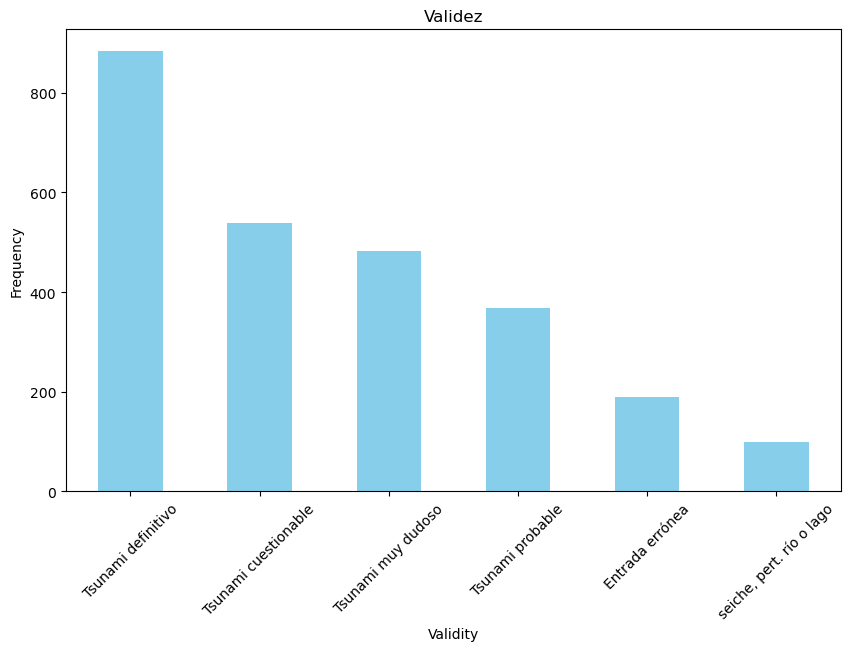

In [14]:
plt.figure(figsize=(10, 6))
df_text['VALIDITIES'].value_counts().plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Validity')
plt.ylabel('Frequency')
plt.title('Validez')
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

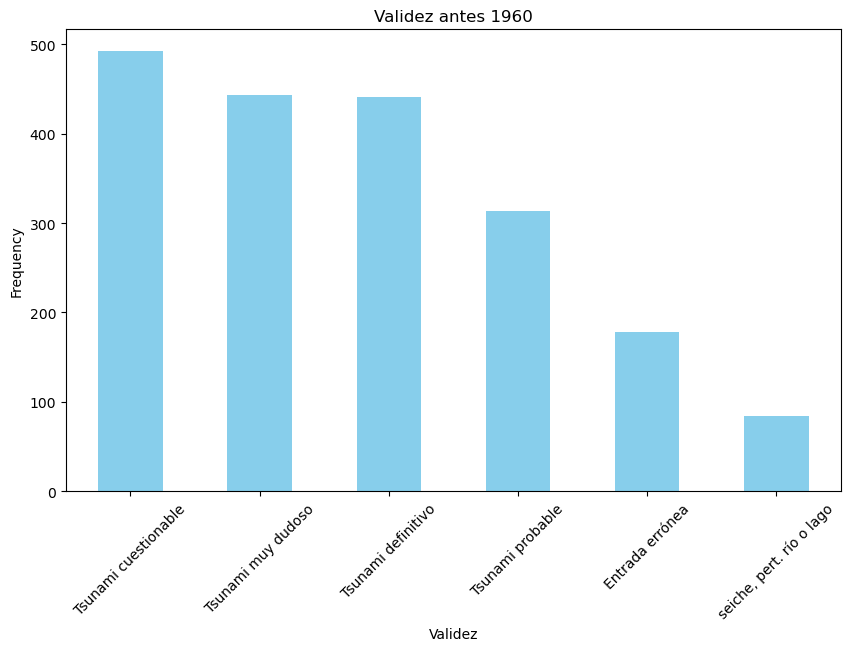

In [15]:

plt.figure(figsize=(10, 6))
df_before['VALIDITIES'].value_counts().plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Validez')
plt.ylabel('Frequency')
plt.title('Validez antes 1960')

plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


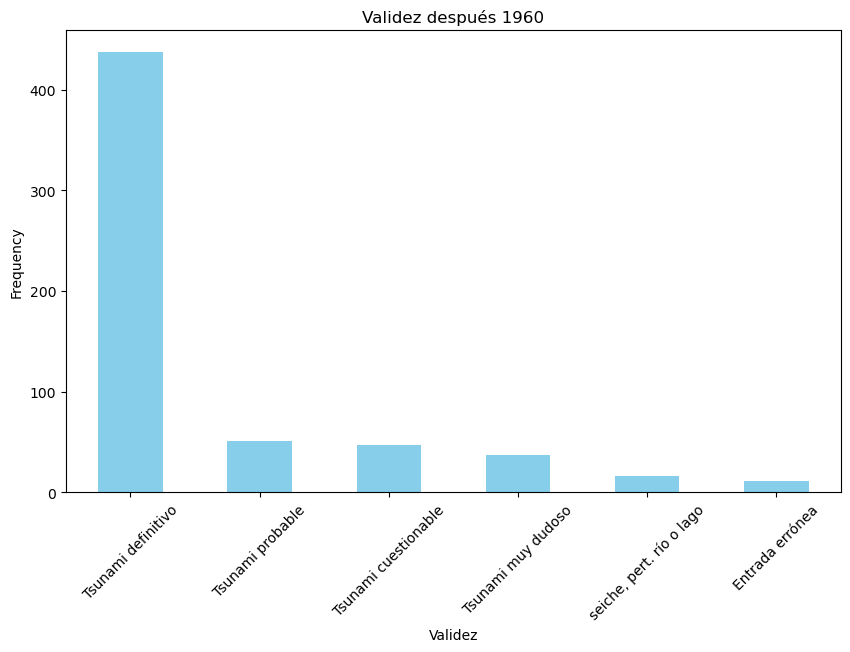

In [16]:

plt.figure(figsize=(10, 6))
df_after['VALIDITIES'].value_counts().plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Validez')
plt.ylabel('Frequency')
plt.title('Validez después 1960')

plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Elimino las entradas previas a 1960 

In [17]:
#df_sources.drop(df_sources[df_sources['YEAR'] < 1960].index, inplace=True)

df_sources = df_sources[df_sources['YEAR'] >= 1960].copy()
df_sources.isnull().sum()

SOURCE_ID      0
YEAR           0
MONTH          1
DAY            2
CAUSE          0
VALIDITY       0
REGION_CODE    0
COUNTRY        0
LOCATION       0
dtype: int64

In [18]:
df_sources[df_sources['DAY'].isnull()]

,SOURCE_ID,YEAR,MONTH,DAY,CAUSE,VALIDITY,REGION_CODE,COUNTRY,LOCATION
2051,5478,1966,NaN,NaN,6.0,3.0,82.0,SOLOMON ISLANDS,"TINAKULA, SANTA CRUZ ISLANDS"
2280,2195,1990,5.0,NaN,0.0,1.0,84.0,PHILIPPINES,"CANIGUIN IS.,PHILIPPINES"


In [19]:
df_sources = df_sources.dropna(subset=['DAY'])
df_sources.isnull().sum()

SOURCE_ID      0
YEAR           0
MONTH          0
DAY            0
CAUSE          0
VALIDITY       0
REGION_CODE    0
COUNTRY        0
LOCATION       0
dtype: int64

In [20]:
df_sources.loc[:, 'DATE'] = pd.to_datetime(df_sources[['YEAR', 'MONTH', 'DAY']])

df_sources

,SOURCE_ID,YEAR,MONTH,DAY,CAUSE,VALIDITY,REGION_CODE,COUNTRY,LOCATION,DATE
1969,1896,1960,1.0,13.0,1.0,1.0,89.0,PERU,S. PERU,1960-01-13
1970,1897,1960,2.0,29.0,1.0,1.0,77.0,MOROCCO,MOROCCO,1960-02-29
1971,1898,1960,3.0,20.0,1.0,4.0,85.0,JAPAN,SANRIKU,1960-03-20
1972,1899,1960,3.0,23.0,1.0,4.0,85.0,JAPAN,SANRIKU,1960-03-23
1973,1901,1960,5.0,21.0,1.0,4.0,89.0,CHILE,CENTRAL CHILE,1960-05-21
...,...,...,...,...,...,...,...,...,...,...
2577,5632,2016,12.0,9.0,1.0,4.0,82.0,SOLOMON ISLANDS,SOLOMON ISLANDS,2016-12-09
2578,5636,2016,12.0,17.0,1.0,4.0,82.0,PAPUA NEW GUINEA,SOLOMON SEA,2016-12-17
2579,5637,2016,12.0,25.0,1.0,4.0,89.0,CHILE,SOUTHERN CHILE,2016-12-25
2580,5639,2017,1.0,3.0,1.0,4.0,81.0,FIJI,FIJI ISLANDS,2017-01-03


In [21]:
df_sources = df_sources.drop(['DAY','MONTH','YEAR'], axis=1)
df_sources.reset_index(drop=True, inplace=True)
df_sources


,SOURCE_ID,CAUSE,VALIDITY,REGION_CODE,COUNTRY,LOCATION,DATE
0,1896,1.0,1.0,89.0,PERU,S. PERU,1960-01-13
1,1897,1.0,1.0,77.0,MOROCCO,MOROCCO,1960-02-29
2,1898,1.0,4.0,85.0,JAPAN,SANRIKU,1960-03-20
3,1899,1.0,4.0,85.0,JAPAN,SANRIKU,1960-03-23
4,1901,1.0,4.0,89.0,CHILE,CENTRAL CHILE,1960-05-21
...,...,...,...,...,...,...,...
603,5632,1.0,4.0,82.0,SOLOMON ISLANDS,SOLOMON ISLANDS,2016-12-09
604,5636,1.0,4.0,82.0,PAPUA NEW GUINEA,SOLOMON SEA,2016-12-17
605,5637,1.0,4.0,89.0,CHILE,SOUTHERN CHILE,2016-12-25
606,5639,1.0,4.0,81.0,FIJI,FIJI ISLANDS,2017-01-03


In [22]:
df_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   SOURCE_ID    608 non-null    int64         
 1   CAUSE        608 non-null    float64       
 2   VALIDITY     608 non-null    float64       
 3   REGION_CODE  608 non-null    float64       
 4   COUNTRY      608 non-null    object        
 5   LOCATION     608 non-null    object        
 6   DATE         608 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 33.4+ KB


In [23]:
df_sources = df_sources.set_index('DATE')
df_sources.head()

,SOURCE_ID,CAUSE,VALIDITY,REGION_CODE,COUNTRY,LOCATION
DATE,,,,,,
1960-01-13,1896,1.0,1.0,89.0,PERU,S. PERU
1960-02-29,1897,1.0,1.0,77.0,MOROCCO,MOROCCO
1960-03-20,1898,1.0,4.0,85.0,JAPAN,SANRIKU
1960-03-23,1899,1.0,4.0,85.0,JAPAN,SANRIKU
1960-05-21,1901,1.0,4.0,89.0,CHILE,CENTRAL CHILE


# + VISUALIZACIONES

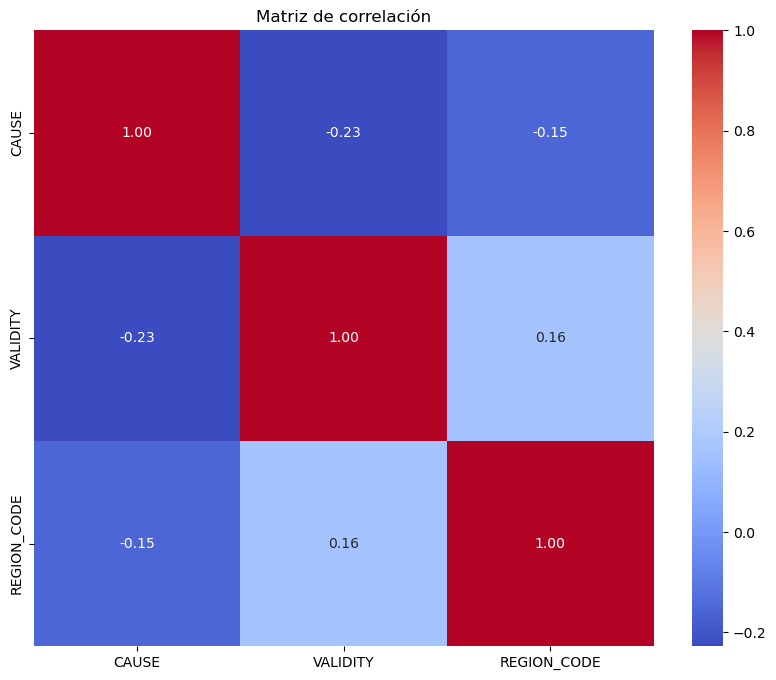

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df_sources[[ 'CAUSE', 'VALIDITY', 'REGION_CODE']]

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


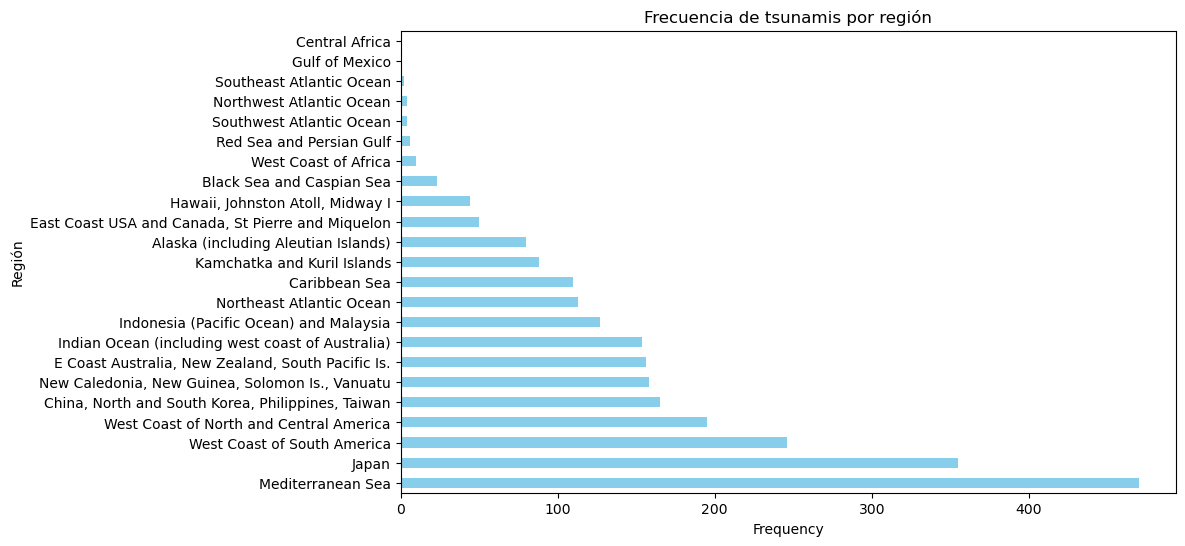

In [25]:
plt.figure(figsize=(10, 6))
df_text['REGION'].value_counts().plot(kind='barh', color='skyblue')

# Añadir etiquetas y título
plt.ylabel('Región')
plt.xlabel('Frequency')
plt.title('Frecuencia de tsunamis por región')

# Mostrar el gráfico
plt.show()

In [26]:
med = df_text[df_text['REGION'] == 'Mediterranean Sea']
med


,SOURCE_ID,YEAR,MONTH,DAY,COUNTRY,LOCATION,VALIDITIES,REGION,CAUSES
0,1,-2000,NaN,NaN,SYRIA,SYRIAN COASTS,Tsunami muy dudoso,Mediterranean Sea,Terremoto
1,3,-1610,NaN,NaN,GREECE,THERA ISLAND (SANTORINI),Tsunami definitivo,Mediterranean Sea,Volcán
2,4,-1365,NaN,NaN,SYRIA,SYRIAN COASTS,Tsunami muy dudoso,Mediterranean Sea,Terremoto
3,5,-1300,NaN,NaN,TURKEY,"IONIAN COASTS, TROAD",Tsunami cuestionable,Mediterranean Sea,Desconocido
4,6,-760,NaN,NaN,ISRAEL,ISRAEL AND LEBANON COASTS,Tsunami cuestionable,Mediterranean Sea,Desconocido
...,...,...,...,...,...,...,...,...,...
2402,2923,2002,12.0,30.0,ITALY,STROMBOLI ISLAND,Tsunami definitivo,Mediterranean Sea,Volcán y deslizamiento de tierra
2405,2403,2003,5.0,21.0,ALGERIA,N. ALGERIA,Tsunami definitivo,Mediterranean Sea,Terremoto
2406,3618,2003,5.0,27.0,ALGERIA,ALGIERS,Tsunami definitivo,Mediterranean Sea,Terremoto
2414,4562,2004,2.0,11.0,JORDAN,DEAD SEA,Tsunami definitivo,Mediterranean Sea,Terremoto


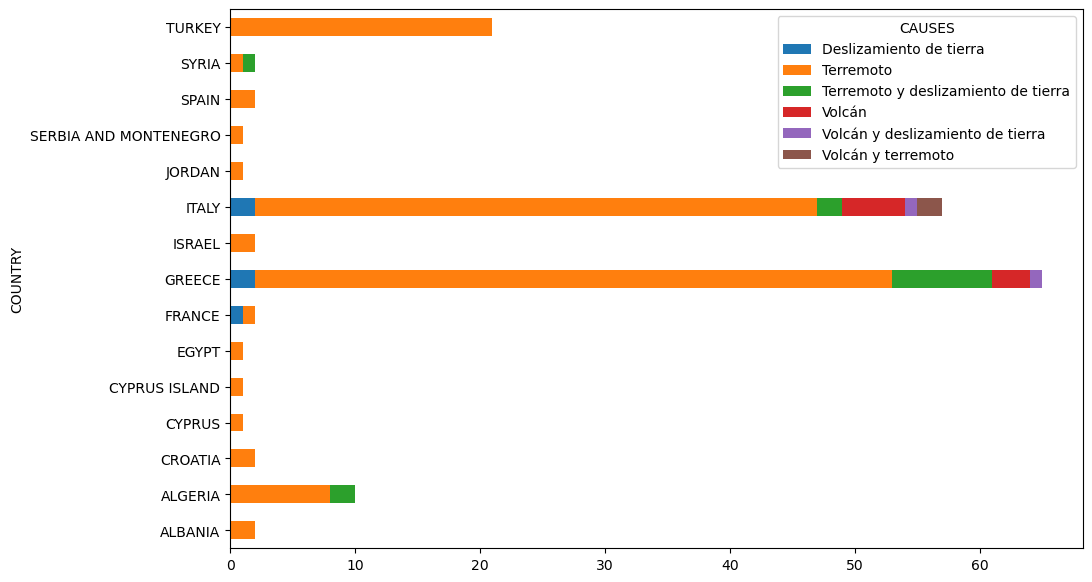

In [27]:
med = df_text[df_text['REGION'] == 'Mediterranean Sea']
med_con = med[(med['CAUSES'] != 'Desconocido')]
med_val = med_con[(med_con['VALIDITIES'].isin(['Tsunami probable', 'Tsunami definitivo']))]
med_grupo = med_val.groupby(['COUNTRY','CAUSES'])

add_counts = med_grupo.size().unstack().fillna(0)
normed_subnet = add_counts.div(add_counts.sum(1), axis=0)
add_counts.plot(kind='barh', legend=True, figsize=(11,7), stacked=True);

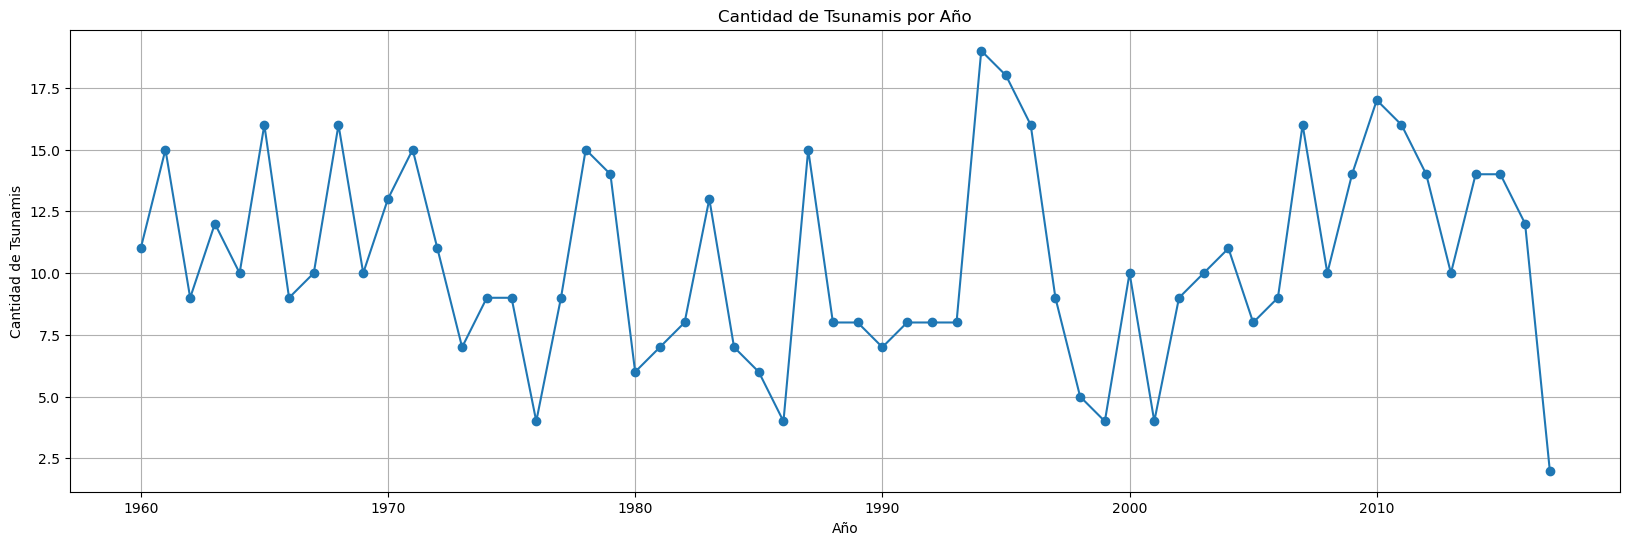

In [28]:
# Agrupar por año y contar la cantidad de tsunamsis
df_por_año = df_sources.groupby(df_sources.index.year).size()

# Grafica de línea
plt.figure(figsize=(20, 6))
plt.plot(df_por_año.index, df_por_año, marker='o')
plt.title('Cantidad de Tsunamis por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Tsunamis')
plt.grid(True)
plt.show()


In [29]:
# Convertir la Serie resultante a DataFrame y renombrar la columna
aa = df_sources.groupby(df_sources.index.year).size()

aa.reset_index(name='Value')

,DATE,Value
0,1960,11
1,1961,15
2,1962,9
3,1963,12
4,1964,10
5,1965,16
6,1966,9
7,1967,10
8,1968,16
9,1969,10


In [30]:
df_por_año.info()

<class 'pandas.core.series.Series'>
Index: 58 entries, 1960 to 2017
Series name: None
Non-Null Count  Dtype
--------------  -----
58 non-null     int64
dtypes: int64(1)
memory usage: 696.0 bytes


# Análisis Exploratorio

## Estacionalidad

El primer paso es verificar la estacionariedad. Los modelos ARIMA requieren datos estacionarios, lo que significa que los valores en la serie de tiempo no dependen del momento en que se observan los datos. La varianza en una serie de tiempo estacionaria es constante. Se utilizará la prueba de Dickey-Fuller. La hipótesis nula aquí es que los datos contienen una raíz unitaria, lo que implica que la serie de tiempo no es estacionaria. 
Debido a que el valor p en los resultados es mayor que 0.05, no podemos rechazar la hipótesis nula (hay una raíz unitaria).

In [31]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

reset = df_sources.groupby(df_sources.index.year).size()
reset = reset.reset_index(name='Value')

X = reset.Value

result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.106743
p-value: 0.000014
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595


El resultado de la prueba de Dickey-Fuller (ADF) proporciona información sobre la estacionariedad de una serie temporal. Aquí está el significado de los resultados:

ADF Statistic: Este es el valor del estadístico de prueba ADF. Cuanto más negativo sea este valor, más fuerte es la evidencia en contra de la presencia de raíces unitarias (es decir, la serie es estacionaria).

p-value: Este es el valor p de la prueba. Un valor p menor que un nivel de significancia (como 0.05) sugiere que podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria, lo que significa que la serie es estacionaria. En este caso, el valor p es muy pequeño (0.000014), lo que indica una fuerte evidencia en contra de la hipótesis nula.

Critical Values: Estos son los valores críticos para diferentes niveles de significancia (1%, 5%, 10%). Si el valor del estadístico de prueba es menor que el valor crítico correspondiente, podemos rechazar la hipótesis nula.

Dado que el valor p es mucho menor que 0.05 y el valor del estadístico ADF es menor que los valores críticos, podemos concluir que la serie es estacionaria con un alto grado de confianza.

## Análisis de autocorrelación:

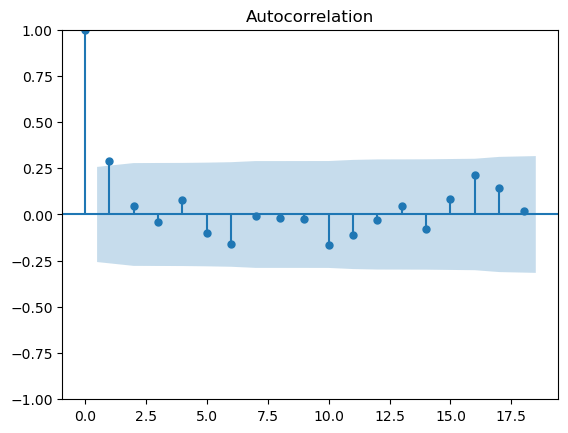

In [32]:
plot_acf(np.array(df_por_año))
plt.show()

## MODELO AUTO ARIMA

In [33]:
!pip install pmdarima

In [34]:
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir los datos en conjunto de entrenamiento y prueba con test_size=0.2
train, test = train_test_split(df_por_año, test_size=0.2, shuffle=False)  # Asumiendo que no necesitas que los datos se mezclen

# Crear índices para los conjuntos de entrenamiento y prueba
x_train = np.array(range(train.shape[0]))
x_test = np.array(range(train.shape[0], df_por_año.shape[0]))

# Imprimir las formas de los conjuntos de datos
print('Train shape:', train.shape)
print('x_train shape:', x_train.shape)
print('Test shape:', test.shape)
print('x_test shape:', x_test.shape)


Train shape: (46,)
x_train shape: (46,)
Test shape: (12,)
x_test shape: (12,)


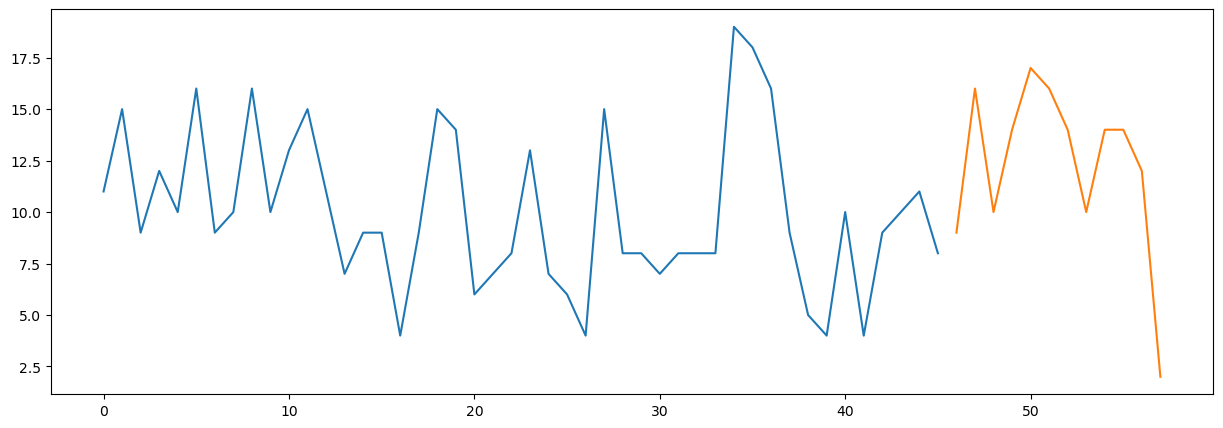

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [36]:
from pmdarima.arima import auto_arima

In [37]:
model = auto_arima(train, start_p=1, start_q=1,
                      max_p=5, max_q=5,             
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=257.820, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=257.484, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=255.963, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=255.972, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=350.600, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=257.665, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=258.897, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=274.796, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.574 seconds


In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -124.981
Date:                Thu, 22 Feb 2024   AIC                            255.963
Time:                        14:08:41   BIC                            261.449
Sample:                             0   HQIC                           258.018
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.2994      1.576      4.632      0.000       4.210      10.388
ar.L1          0.2695      0.144      1.873      0.061      -0.013       0.552
sigma2        13.3892      3.453      3.877      0.000       6.621      20.157
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.35
Prob(Q):                              0.85   Prob(JB):                         0.31
Heteroskedasticity (H):               1.56   Skew:                             0.51
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Modelo SARIMAX(1, 0, 0):
- El modelo ajustado es un modelo SARIMAX con un componente autoregresivo de orden 1 (AR(1)), lo que sugiere que el valor actual de la serie temporal está relacionado linealmente con su valor anterior.

### Coeficientes estimados:

- El coeficiente de intercepción es 7.2994, lo que significa que se espera que la serie tenga un valor promedio de aproximadamente 7.3 unidades.
- El coeficiente del componente autoregresivo (AR(1)) es 0.2695, lo que indica la fuerza y la dirección de la relación lineal entre las observaciones pasadas y presentes.
- La varianza residual del modelo (sigma2) es 13.3892, que representa la variabilidad no explicada por el modelo.

### Medidas de ajuste:
- El logaritmo de la función de verosimilitud es -124.981, lo que indica el valor máximo de la función de verosimilitud alcanzado por el modelo.
- Los criterios de información (AIC, BIC, HQIC) proporcionan medidas relativas de la calidad del ajuste del modelo, con valores más bajos indicando un mejor ajuste.

### Diagnósticos estadísticos:

- Autocorrelación en los residuos (Ljung-Box (L1) (Q)): El valor estadístico de la prueba de Ljung-Box (L1) es 0.04, y el valor p asociado (Prob(Q)) es 0.85. Dado que Prob(Q) es mayor que 0.05, no podemos rechazar la hipótesis nula de independencia en los residuos. Esto sugiere que los residuos no muestran correlación significativa.

- Normalidad de los residuos (Jarque-Bera (JB)): El valor del estadístico de Jarque-Bera es 2.35, y el valor p asociado (Prob(JB)) es 0.31. Aunque el valor de Jarque-Bera no es muy alto, la probabilidad asociada sugiere que no hay suficiente evidencia para rechazar la hipótesis de normalidad de los residuos a un nivel de significancia convencional (por ejemplo, 0.05).Esto sugiere que los residuos podrían ser aproximadamente normalmente distribuidos.

- Heterocedasticidad en los residuos (Heteroskedasticity (H)):El valor de la prueba de heterocedasticidad (H) es 1.56, y el valor p asociado (Prob(H)) es 0.40. Dado que Prob(H) es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad. Sin embargo, la homocedasticidad no puede ser confirmada con certeza, ya que el valor p es relativamente cercano al umbral de significancia de 0.05.

- Asimetría y Kurtosis (Skew y Kurtosis):  El coeficiente de asimetría (Skew) es 0.51, lo que sugiere una ligera asimetría positiva en la distribución de los residuos. La kurtosis es 2.58, lo que indica una distribución de los residuos con una cola más pesada que la distribución normal (distribución leptocúrtica).


En resumen, los residuos parecen ser ruido blanco, no muestran autocorrelación significativa y no violan las suposiciones de normalidad y homocedasticidad. Sin embargo, hay una ligera asimetría positiva en la distribución de los residuos y una cola más pesada que la distribución normal, lo que podría indicar una leve desviación de la normalidad.



In [39]:
# Realizar la predicción con intervalos de confianza
prediction, confint = model.predict(n_periods=len(test), return_conf_int=True)

# Imprimir las predicciones
print("Predicciones:", prediction)

# Imprimir los intervalos de confianza si lo deseas
print("Intervalos de confianza:", confint)

Predicciones: 46    9.455288
47    9.847467
48    9.953154
49    9.981635
50    9.989310
51    9.991378
52    9.991936
53    9.992086
54    9.992126
55    9.992137
56    9.992140
57    9.992141
dtype: float64
Intervalos de confianza: [[ 2.283537   16.62703998]
 [ 2.41986492 17.2750699 ]
 [ 2.50731329 17.39899446]
 [ 2.53447149 17.42879817]
 [ 2.54205064 17.43656942]
 [ 2.54411202 17.43864475]
 [ 2.5446689  17.43920265]
 [ 2.54481907 17.4393529 ]
 [ 2.54485955 17.43939338]
 [ 2.54487046 17.43940429]
 [ 2.5448734  17.43940723]
 [ 2.54487419 17.43940802]]


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [40]:
cf= pd.DataFrame(confint)

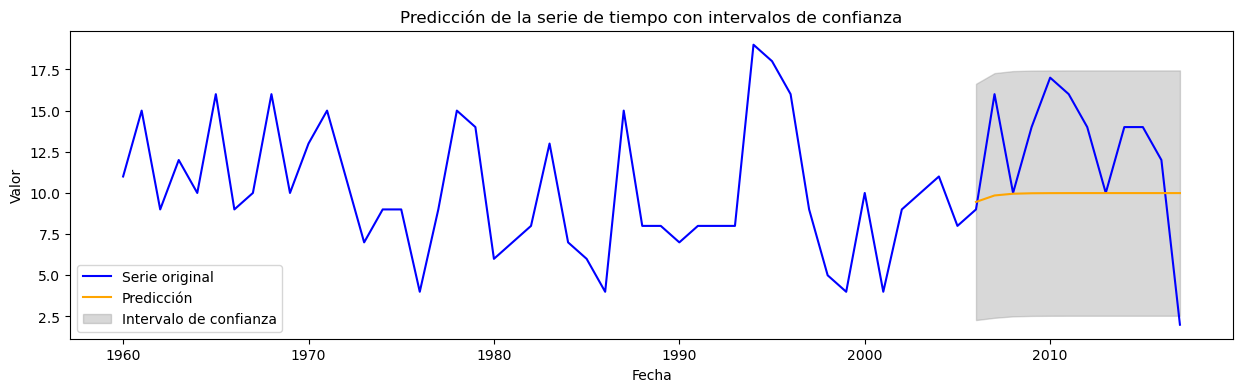

In [41]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 4))

# Graficar la serie de tiempo original
ax.plot(df_por_año.index, df_por_año, label='Serie original', color='blue')

# Graficar la predicción
ax.plot(test.index, prediction, label='Predicción', color='orange')

# Rellenar el área entre los intervalos de confianza
ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='grey', alpha=0.3, label='Intervalo de confianza')

# Añadir etiquetas y leyenda
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
ax.set_title('Predicción de la serie de tiempo con intervalos de confianza')
ax.legend()

# Mostrar la gráfica
plt.show()



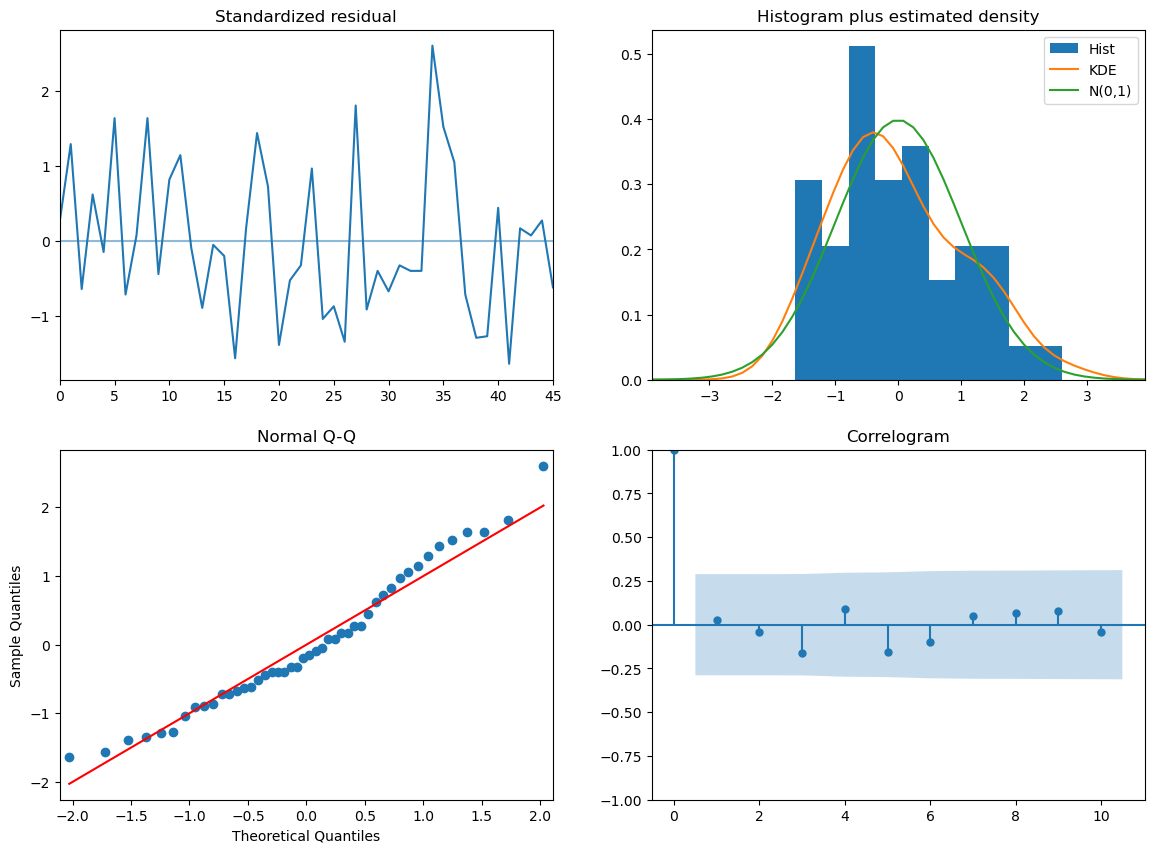

In [42]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

# PRECISION MODELO

In [43]:
# Calcula el MSE y el R^2
mse = mean_squared_error(test, prediction)
r2 = r2_score(test, prediction)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 21.296681684902037
Coeficiente de determinación (R^2): -0.354559259110377


un coeficiente de determinación R2 negativo (-0.35) es inusual y sugiere que el modelo no es útil para hacer predicciones sobre los datos. El R2 se interpreta generalmente como la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente en un modelo de regresión. Un R2  negativo significa que el modelo no se ajusta en absoluto a los datos y puede ser peor que simplemente utilizar la media como predicción.